## 初始準備
Keras 可以用各種不同的深度學習套件當底層，在此指定使用 Tensorflow 確保執行的一致性

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


標準數據分析動作

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 讀入 MNIST

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


### 確認訓練資料是否為 6 萬筆，測試資料是否為 1 筆

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

### 確認資料的樣子

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 顯示圖檔

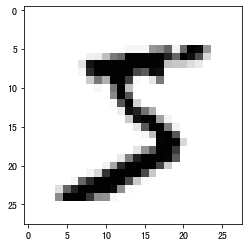

In [9]:
plt.imshow(x_train[0], cmap='Greys')

### 確認答案

In [10]:
y_train[0]

5

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### one hot encoding

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 第一個神經網路
* 使用 2 個隱藏層 (hidden layers)
* 每個 kidden layer 用 500 個神經元
* Activation Function 指名 sigmoid

從 Keras 把相關套件讀進來

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

### 建構神經網路

In [18]:
model = Sequential()

### add 加第一層隱藏層

In [20]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

### 第二層：因為前面輸出是 500，第二層還是用 500

In [21]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

輸出，用 softmax 當激發函數

In [22]:
model.add(Dense(10))
model.add(Activation('softmax'))

到這邊神經網路就完成了

### 組裝

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),
             metrics=['accuracy'])

### 檢視神經網路
看 model 的 summary

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 392500

784*500 + 500

392500

In [26]:
# 250500

500*500+500

250500

In [27]:
# 5010

500*10+10

5010

### 訓練神經網路

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=20)




Epoch 1/20





60000/60000 [==============================] - 14s 237us/step - loss: 0.0827 - acc: 0.3588
Epoch 2/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0632 - acc: 0.6187
Epoch 3/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.0457 - acc: 0.7559
Epoch 4/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0335 - acc: 0.8408
Epoch 5/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0259 - acc: 0.8752
Epoch 6/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0214 - acc: 0.8904
Epoch 7/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0186 - acc: 0.8995
Epoch 8/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0168 - acc: 0.9066
Epoch 9/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0154 - acc: 0.9122
Epoch 10/20
60000/60000 [==============================] - 12s 208us/step 

### 試用結果

In [29]:
from ipywidgets import interact_manual

predict 放神經網路學習結果

In [30]:
predict = model.predict_classes(x_test)

In [31]:
def test(test_num):
    plt.imshow(x_test[test_num].reshape(28,28), cmap='Greys')
    print('神經網路判斷為：', predict[test_num])

In [36]:
interact_manual(test, test_num = (0, 9999));

interactive(children=(IntSlider(value=4999, description='test_num', max=9999), Button(description='Run Interac…

### 訓練好的神經網路存起來
訓練好的不想再訓練一次，可以把神經網路架構存起來，供日後使用
在終端機下安裝 pyh5
```
conda install h5py
```

In [33]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriteing_model_weights.h5')